# Human Activity Recognition Classification Using Python
# Hala Waseem Aye 

## Import Packages 

In [126]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adagrad

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


#from sklearn.preprocessing import StandardScaler
#from sklearn import preprocessing

## Reading Data

In [127]:
df=pd.read_csv('Activity.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [128]:
DFTest=pd.read_csv('X_test.csv',index_col=False).drop(columns=['Unnamed: 0'])

In [129]:
df

1           2         3           4         5         6  \
0     2135.236252  281.976538 -0.109396  875.771368 -0.123244 -0.281097   
1     2135.311377  281.974815 -0.147144  875.701796 -0.105104 -0.372639   
2     2135.368373  281.960616 -0.148159  875.971211 -0.049818 -0.500648   
3     2135.263336  281.983004 -0.103230  875.016028 -0.988986 -0.991141   
4     2135.281720  281.984030 -0.110049  875.007066 -0.994860 -0.995871   
...           ...         ...       ...         ...       ...       ...   
9985  2135.079402  282.140627 -0.125298  875.132585  0.073153 -0.943445   
9986  2135.274545  282.010493 -0.143173  875.634461 -0.108416 -0.615635   
9987  2135.285663  281.983356 -0.109658  876.192759  0.140667       NaN   
9988          NaN  281.994029       NaN  875.799827  0.051767 -0.474430   
9989  2135.261849  281.939218       NaN  875.720784 -0.290167 -0.121089   

             7            8           9        10  ...         583       584  \
0    -0.265103  1897.816418  851.707715  0.217989  ...         NaN -0.606182   
1    -0.383011  1897.854053  851.639244  0.069007  ...  125.017049 -0.668752   
2    -0.108752  1898.014887  851.496415  0.137359  ...         NaN -0.462907   
3    -0.985290  1897.010854  851.008325 -0.933950  ...  125.000547 -0.997064   
4    -0.993036  1897.006260  851.004576 -0.938318  ...         NaN -0.998858   
...        ...          ...         ...       ...  ...         ...       ...   
9985 -0.863163  1898.086906  851.060549 -0.925076  ...         NaN -0.982536   
9986 -0.380406  1897.882354  851.390695 -0.193712  ...  125.020139 -0.483664   
9987  0.179245  1898.124981  851.554944  0.396325  ...         NaN -0.064028   
9988 -0.224016  1898.034147  851.561301 -0.080235  ...         NaN -0.265202   
9989 -0.318726  1897.687079  851.860805  0.121174  ...  125.038325 -0.340918   

           585         586       587       588          589         590  \
0          NaN  734.183280  0.871030 -0.399949  2135.236252  573.367937   
1    -0.521300  734.019049  0.826877 -0.324508  2135.311377  573.275864   
2    -0.225391  734.159391  0.714265 -0.492571  2135.368373  573.197053   
3    -0.984804  734.005127 -0.618741 -0.993283  2135.263336  573.000178   
4    -0.993022  734.005172 -0.692740 -0.993393  2135.281720  573.000099   
...        ...         ...       ...       ...          ...         ...   
9985       NaN  735.454192 -0.011720 -0.917733  2135.079402  573.006384   
9986 -0.397042  734.014706  0.780852 -0.732555  2135.274545  573.265398   
9987  0.136585  734.184942  0.893465 -0.620848  2135.285663  573.342333   
9988 -0.243837  734.096657  0.784232 -0.358635  2135.292354  573.230408   
9989       NaN  734.124230  0.812368 -0.340920  2135.261849  573.120410   

             591            Activity  
0     352.125227             WALKING  
1     352.027432    WALKING_UPSTAIRS  
2     352.033002    WALKING_UPSTAIRS  
3     352.000020              LAYING  
4     352.000009              LAYING  
...          ...                 ...  
9985  352.001088             SITTING  
9986  352.085728             WALKING  
9987  352.020686  WALKING_DOWNSTAIRS  
9988  352.037431  WALKING_DOWNSTAIRS  
9989  352.153319    WALKING_UPSTAIRS  

[9990 rows x 592 columns]

In [130]:
DFTest

1           2         3           4         5         6  \
0    2135.277880  281.982374 -0.108436  875.005198 -0.952356 -0.979984   
1    2135.274649  281.977831 -0.120136  875.002610 -0.993128 -0.979517   
2    2135.259475  281.985347 -0.104619  875.041627 -0.963087 -0.984063   
3    2135.307123  281.961987 -0.145827  875.697118 -0.150019 -0.125775   
4    2135.141467  281.955141 -0.072572  876.139005 -0.229146  0.118600   
..           ...         ...       ...         ...       ...       ...   
304  2135.286841  281.986279       NaN  875.030453 -0.914033 -0.950577   
305  2135.276039  281.985130 -0.080196  875.070146 -0.800382 -0.736420   
306  2135.302184  281.966213 -0.130727  875.569464 -0.254964 -0.111800   
307  2134.127605  282.154608  0.330753  875.939361 -0.306884  0.068578   
308  2135.256209  281.979558 -0.121508  875.651713  0.137464 -0.168046   

            7            8        10        11  ...       582         583  \
0   -0.995380  1897.051449 -0.937402 -0.550173  ... -0.999897  125.000707   
1   -0.998225  1897.007912 -0.942807 -0.580385  ... -0.999864         NaN   
2   -0.957998  1897.040356 -0.914429 -0.557181  ... -0.999797         NaN   
3   -0.337688  1897.835300 -0.217076 -0.105233  ... -0.931232         NaN   
4    0.032058  1897.682290  0.551623  0.210984  ... -0.725425         NaN   
..        ...          ...       ...       ...  ...       ...         ...   
304 -0.971859  1897.080921 -0.891277 -0.493893  ... -0.995389  125.001542   
305 -0.950752  1897.178953 -0.802627 -0.428028  ... -0.994159  125.003597   
306 -0.457695  1897.721497 -0.290227 -0.011022  ... -0.904010  125.067424   
307 -0.104270  1897.755408 -0.835074  0.039751  ... -0.925590         NaN   
308 -0.384949  1898.135201 -0.032961  0.101327  ... -0.494427  125.077120   

          584       585         586       587       588          589  \
0   -0.988601 -0.995886  734.005904 -0.336026 -0.968572  2135.277880   
1   -0.999030 -0.998731  734.015125 -0.890670 -0.968459  2135.274649   
2   -0.991843 -0.956208  734.006320 -0.573251 -0.970980  2135.259475   
3   -0.460524       NaN  734.272621  0.801238  0.070937  2135.307123   
4   -0.486854       NaN  734.171993  0.857132  0.026913  2135.141467   
..        ...       ...         ...       ...       ...          ...   
304 -0.964727       NaN  734.000316 -0.009229 -0.963581  2135.286841   
305 -0.895115 -0.972352  734.047733  0.273691 -0.728726  2135.276039   
306 -0.330258 -0.524783  734.232088  0.781728 -0.012748  2135.302184   
307 -0.918539 -0.142425  734.767301  0.499777  0.336663  2134.127605   
308 -0.256387 -0.477569  734.484485  0.906985  0.002056  2135.256209   

            590         591  
0    573.000215  352.000192  
1    573.000061  352.000007  
2    573.000158  352.000017  
3    573.236869  352.185924  
4    573.284080  352.042186  
..          ...         ...  
304  573.004217  352.000277  
305  573.010055  352.000224  
306  573.194881  352.024802  
307  573.014223  352.006263  
308  573.688146  352.056897  

[309 rows x 590 columns]

## Exploratory Data Analysis (EDA)

In [131]:
df.isna().sum()

1           1000
2              0
3           1006
4              0
5              0
            ... 
588            0
589            0
590            0
591            0
Activity       0
Length: 592, dtype: int64

In [132]:
df.isna().sum().sum()

40964

In [133]:
Ac=pd.DataFrame(df['Activity'])

In [134]:
Ac.Activity.value_counts()

LAYING                1900
STANDING              1838
SITTING               1723
WALKING               1665
WALKING_UPSTAIRS      1498
WALKING_DOWNSTAIRS    1366
Name: Activity, dtype: int64

In [135]:
Ac.Activity.isna().sum()

0

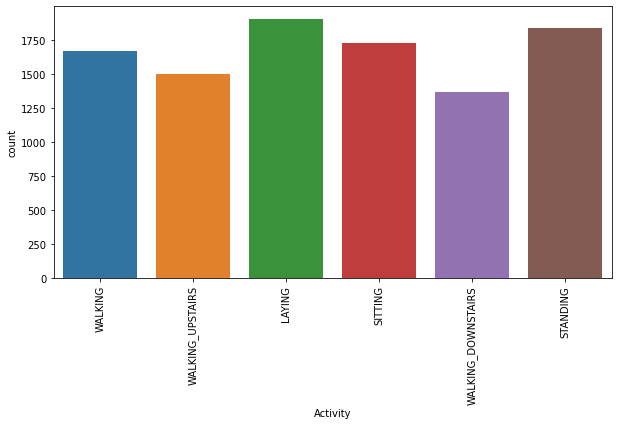

In [136]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=df['Activity'], data=df)
plt.xticks(x = df['Activity'],  rotation='vertical')
plt.show()

In [137]:
DFTr=df.drop(['Activity'],axis=1)

In [138]:
DFTr

1           2         3           4         5         6  \
0     2135.236252  281.976538 -0.109396  875.771368 -0.123244 -0.281097   
1     2135.311377  281.974815 -0.147144  875.701796 -0.105104 -0.372639   
2     2135.368373  281.960616 -0.148159  875.971211 -0.049818 -0.500648   
3     2135.263336  281.983004 -0.103230  875.016028 -0.988986 -0.991141   
4     2135.281720  281.984030 -0.110049  875.007066 -0.994860 -0.995871   
...           ...         ...       ...         ...       ...       ...   
9985  2135.079402  282.140627 -0.125298  875.132585  0.073153 -0.943445   
9986  2135.274545  282.010493 -0.143173  875.634461 -0.108416 -0.615635   
9987  2135.285663  281.983356 -0.109658  876.192759  0.140667       NaN   
9988          NaN  281.994029       NaN  875.799827  0.051767 -0.474430   
9989  2135.261849  281.939218       NaN  875.720784 -0.290167 -0.121089   

             7            8           9        10  ...       582         583  \
0    -0.265103  1897.816418  851.707715  0.217989  ... -0.621741         NaN   
1    -0.383011  1897.854053  851.639244  0.069007  ... -0.862140  125.017049   
2    -0.108752  1898.014887  851.496415  0.137359  ... -0.896673         NaN   
3    -0.985290  1897.010854  851.008325 -0.933950  ... -0.999815  125.000547   
4    -0.993036  1897.006260  851.004576 -0.938318  ... -0.999875         NaN   
...        ...          ...         ...       ...  ...       ...         ...   
9985 -0.863163  1898.086906  851.060549 -0.925076  ... -0.858270         NaN   
9986 -0.380406  1897.882354  851.390695 -0.193712  ... -0.829427  125.020139   
9987  0.179245  1898.124981  851.554944  0.396325  ... -0.846610         NaN   
9988 -0.224016  1898.034147  851.561301 -0.080235  ... -0.934534         NaN   
9989 -0.318726  1897.687079  851.860805  0.121174  ... -0.919884  125.038325   

           584       585         586       587       588          589  \
0    -0.606182       NaN  734.183280  0.871030 -0.399949  2135.236252   
1    -0.668752 -0.521300  734.019049  0.826877 -0.324508  2135.311377   
2    -0.462907 -0.225391  734.159391  0.714265 -0.492571  2135.368373   
3    -0.997064 -0.984804  734.005127 -0.618741 -0.993283  2135.263336   
4    -0.998858 -0.993022  734.005172 -0.692740 -0.993393  2135.281720   
...        ...       ...         ...       ...       ...          ...   
9985 -0.982536       NaN  735.454192 -0.011720 -0.917733  2135.079402   
9986 -0.483664 -0.397042  734.014706  0.780852 -0.732555  2135.274545   
9987 -0.064028  0.136585  734.184942  0.893465 -0.620848  2135.285663   
9988 -0.265202 -0.243837  734.096657  0.784232 -0.358635  2135.292354   
9989 -0.340918       NaN  734.124230  0.812368 -0.340920  2135.261849   

             590         591  
0     573.367937  352.125227  
1     573.275864  352.027432  
2     573.197053  352.033002  
3     573.000178  352.000020  
4     573.000099  352.000009  
...          ...         ...  
9985  573.006384  352.001088  
9986  573.265398  352.085728  
9987  573.342333  352.020686  
9988  573.230408  352.037431  
9989  573.120410  352.153319  

[9990 rows x 591 columns]

### Concatinating Test and Train Data 


In [139]:
DFConcat = pd.concat([DFTr, DFTest])

In [140]:
DFConcat

1           2         3           4         5         6  \
0    2135.236252  281.976538 -0.109396  875.771368 -0.123244 -0.281097   
1    2135.311377  281.974815 -0.147144  875.701796 -0.105104 -0.372639   
2    2135.368373  281.960616 -0.148159  875.971211 -0.049818 -0.500648   
3    2135.263336  281.983004 -0.103230  875.016028 -0.988986 -0.991141   
4    2135.281720  281.984030 -0.110049  875.007066 -0.994860 -0.995871   
..           ...         ...       ...         ...       ...       ...   
304  2135.286841  281.986279       NaN  875.030453 -0.914033 -0.950577   
305  2135.276039  281.985130 -0.080196  875.070146 -0.800382 -0.736420   
306  2135.302184  281.966213 -0.130727  875.569464 -0.254964 -0.111800   
307  2134.127605  282.154608  0.330753  875.939361 -0.306884  0.068578   
308  2135.256209  281.979558 -0.121508  875.651713  0.137464 -0.168046   

            7            8           9        10  ...       582         583  \
0   -0.265103  1897.816418  851.707715  0.217989  ... -0.621741         NaN   
1   -0.383011  1897.854053  851.639244  0.069007  ... -0.862140  125.017049   
2   -0.108752  1898.014887  851.496415  0.137359  ... -0.896673         NaN   
3   -0.985290  1897.010854  851.008325 -0.933950  ... -0.999815  125.000547   
4   -0.993036  1897.006260  851.004576 -0.938318  ... -0.999875         NaN   
..        ...          ...         ...       ...  ...       ...         ...   
304 -0.971859  1897.080921         NaN -0.891277  ... -0.995389  125.001542   
305 -0.950752  1897.178953         NaN -0.802627  ... -0.994159  125.003597   
306 -0.457695  1897.721497         NaN -0.290227  ... -0.904010  125.067424   
307 -0.104270  1897.755408         NaN -0.835074  ... -0.925590         NaN   
308 -0.384949  1898.135201         NaN -0.032961  ... -0.494427  125.077120   

          584       585         586       587       588          589  \
0   -0.606182       NaN  734.183280  0.871030 -0.399949  2135.236252   
1   -0.668752 -0.521300  734.019049  0.826877 -0.324508  2135.311377   
2   -0.462907 -0.225391  734.159391  0.714265 -0.492571  2135.368373   
3   -0.997064 -0.984804  734.005127 -0.618741 -0.993283  2135.263336   
4   -0.998858 -0.993022  734.005172 -0.692740 -0.993393  2135.281720   
..        ...       ...         ...       ...       ...          ...   
304 -0.964727       NaN  734.000316 -0.009229 -0.963581  2135.286841   
305 -0.895115 -0.972352  734.047733  0.273691 -0.728726  2135.276039   
306 -0.330258 -0.524783  734.232088  0.781728 -0.012748  2135.302184   
307 -0.918539 -0.142425  734.767301  0.499777  0.336663  2134.127605   
308 -0.256387 -0.477569  734.484485  0.906985  0.002056  2135.256209   

            590         591  
0    573.367937  352.125227  
1    573.275864  352.027432  
2    573.197053  352.033002  
3    573.000178  352.000020  
4    573.000099  352.000009  
..          ...         ...  
304  573.004217  352.000277  
305  573.010055  352.000224  
306  573.194881  352.024802  
307  573.014223  352.006263  
308  573.688146  352.056897  

[10299 rows x 591 columns]

In [141]:
DFcon = DFConcat.dropna(axis=1)

In [142]:
DFcon

2           4         5         7            8        10  \
0    281.976538  875.771368 -0.123244 -0.265103  1897.816418  0.217989   
1    281.974815  875.701796 -0.105104 -0.383011  1897.854053  0.069007   
2    281.960616  875.971211 -0.049818 -0.108752  1898.014887  0.137359   
3    281.983004  875.016028 -0.988986 -0.985290  1897.010854 -0.933950   
4    281.984030  875.007066 -0.994860 -0.993036  1897.006260 -0.938318   
..          ...         ...       ...       ...          ...       ...   
304  281.986279  875.030453 -0.914033 -0.971859  1897.080921 -0.891277   
305  281.985130  875.070146 -0.800382 -0.950752  1897.178953 -0.802627   
306  281.966213  875.569464 -0.254964 -0.457695  1897.721497 -0.290227   
307  282.154608  875.939361 -0.306884 -0.104270  1897.755408 -0.835074   
308  281.979558  875.651713  0.137464 -0.384949  1898.135201 -0.032961   

           11        12        13        14  ...       580       581  \
0   -0.132213 -0.119169  0.300810 -0.037110  ... -0.808196 -0.670617   
1   -0.185177 -0.411590  0.275415  0.115468  ... -0.938103 -0.918679   
2   -0.069053 -0.360005  0.138482  0.216248  ... -0.930992 -0.883636   
3   -0.569576 -0.810454  0.832224  0.691552  ... -0.999822 -0.999781   
4   -0.572974 -0.823210  0.847510  0.694976  ... -0.999955 -0.999889   
..        ...       ...       ...       ...  ...       ...       ...   
304 -0.493893 -0.786736  0.837023  0.653436  ... -0.999263 -0.998589   
305 -0.428028 -0.626317  0.729662  0.566190  ... -0.997117 -0.996957   
306 -0.011022 -0.356775  0.320795  0.286297  ... -0.948077 -0.891761   
307  0.039751  0.276748 -0.702185  0.642246  ... -0.980059 -0.959674   
308  0.101327 -0.431744  0.362523  0.032510  ... -0.684022 -0.429204   

          582       584         586       587       588          589  \
0   -0.621741 -0.606182  734.183280  0.871030 -0.399949  2135.236252   
1   -0.862140 -0.668752  734.019049  0.826877 -0.324508  2135.311377   
2   -0.896673 -0.462907  734.159391  0.714265 -0.492571  2135.368373   
3   -0.999815 -0.997064  734.005127 -0.618741 -0.993283  2135.263336   
4   -0.999875 -0.998858  734.005172 -0.692740 -0.993393  2135.281720   
..        ...       ...         ...       ...       ...          ...   
304 -0.995389 -0.964727  734.000316 -0.009229 -0.963581  2135.286841   
305 -0.994159 -0.895115  734.047733  0.273691 -0.728726  2135.276039   
306 -0.904010 -0.330258  734.232088  0.781728 -0.012748  2135.302184   
307 -0.925590 -0.918539  734.767301  0.499777  0.336663  2134.127605   
308 -0.494427 -0.256387  734.484485  0.906985  0.002056  2135.256209   

            590         591  
0    573.367937  352.125227  
1    573.275864  352.027432  
2    573.197053  352.033002  
3    573.000178  352.000020  
4    573.000099  352.000009  
..          ...         ...  
304  573.004217  352.000277  
305  573.010055  352.000224  
306  573.194881  352.024802  
307  573.014223  352.006263  
308  573.688146  352.056897  

[10299 rows x 558 columns]

In [143]:
DFC=DFcon.rename(columns={x:y for x,y in zip(DFcon.columns,range(1,len(DFcon.columns)))})

In [144]:
DFC

1           2         3         4            5         6  \
0    281.976538  875.771368 -0.123244 -0.265103  1897.816418  0.217989   
1    281.974815  875.701796 -0.105104 -0.383011  1897.854053  0.069007   
2    281.960616  875.971211 -0.049818 -0.108752  1898.014887  0.137359   
3    281.983004  875.016028 -0.988986 -0.985290  1897.010854 -0.933950   
4    281.984030  875.007066 -0.994860 -0.993036  1897.006260 -0.938318   
..          ...         ...       ...       ...          ...       ...   
304  281.986279  875.030453 -0.914033 -0.971859  1897.080921 -0.891277   
305  281.985130  875.070146 -0.800382 -0.950752  1897.178953 -0.802627   
306  281.966213  875.569464 -0.254964 -0.457695  1897.721497 -0.290227   
307  282.154608  875.939361 -0.306884 -0.104270  1897.755408 -0.835074   
308  281.979558  875.651713  0.137464 -0.384949  1898.135201 -0.032961   

            7         8         9        10  ...       549       550  \
0   -0.132213 -0.119169  0.300810 -0.037110  ... -0.808196 -0.670617   
1   -0.185177 -0.411590  0.275415  0.115468  ... -0.938103 -0.918679   
2   -0.069053 -0.360005  0.138482  0.216248  ... -0.930992 -0.883636   
3   -0.569576 -0.810454  0.832224  0.691552  ... -0.999822 -0.999781   
4   -0.572974 -0.823210  0.847510  0.694976  ... -0.999955 -0.999889   
..        ...       ...       ...       ...  ...       ...       ...   
304 -0.493893 -0.786736  0.837023  0.653436  ... -0.999263 -0.998589   
305 -0.428028 -0.626317  0.729662  0.566190  ... -0.997117 -0.996957   
306 -0.011022 -0.356775  0.320795  0.286297  ... -0.948077 -0.891761   
307  0.039751  0.276748 -0.702185  0.642246  ... -0.980059 -0.959674   
308  0.101327 -0.431744  0.362523  0.032510  ... -0.684022 -0.429204   

          551       552         553       554       555          556  \
0   -0.621741 -0.606182  734.183280  0.871030 -0.399949  2135.236252   
1   -0.862140 -0.668752  734.019049  0.826877 -0.324508  2135.311377   
2   -0.896673 -0.462907  734.159391  0.714265 -0.492571  2135.368373   
3   -0.999815 -0.997064  734.005127 -0.618741 -0.993283  2135.263336   
4   -0.999875 -0.998858  734.005172 -0.692740 -0.993393  2135.281720   
..        ...       ...         ...       ...       ...          ...   
304 -0.995389 -0.964727  734.000316 -0.009229 -0.963581  2135.286841   
305 -0.994159 -0.895115  734.047733  0.273691 -0.728726  2135.276039   
306 -0.904010 -0.330258  734.232088  0.781728 -0.012748  2135.302184   
307 -0.925590 -0.918539  734.767301  0.499777  0.336663  2134.127605   
308 -0.494427 -0.256387  734.484485  0.906985  0.002056  2135.256209   

            557         591  
0    573.367937  352.125227  
1    573.275864  352.027432  
2    573.197053  352.033002  
3    573.000178  352.000020  
4    573.000099  352.000009  
..          ...         ...  
304  573.004217  352.000277  
305  573.010055  352.000224  
306  573.194881  352.024802  
307  573.014223  352.006263  
308  573.688146  352.056897  

[10299 rows x 558 columns]

### Principle Component Analysis (PCA)

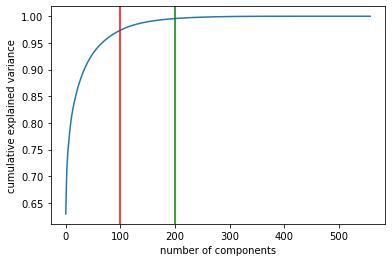

In [145]:
pca = PCA().fit(DFC)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axvline(x=100,color='r')
plt.axvline(x=200,color='g')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [146]:
pca = PCA(200)
pca.fit(DFC)
x_pca=pca.transform(DFC)

In [147]:
x_pca

array([[ 5.37239836e+00,  2.64736657e-01, -3.67613713e-01, ...,
         3.04072558e-02,  5.23292104e-02,  8.97321827e-02],
       [ 4.14877394e+00, -1.61569376e+00, -1.33601643e-02, ...,
        -5.34621670e-03,  3.19505356e-02, -6.04799327e-02],
       [ 4.46240574e+00, -1.58256759e+00,  4.45603190e-01, ...,
        -1.18714590e-01, -9.11149767e-02, -7.65956619e-02],
       ...,
       [ 3.96693703e+00, -1.16959236e+00, -5.27450177e-01, ...,
         2.89864098e-02,  3.36824917e-03,  1.97234104e-02],
       [ 2.46095195e+00, -3.11087511e+00,  3.30566052e+00, ...,
        -2.64595945e-01,  3.73768980e-02,  4.91440754e-02],
       [ 6.93772804e+00,  6.94733428e-01, -1.56239694e-01, ...,
         6.99750617e-02, -4.24698331e-02, -2.54112967e-03]])

In [148]:
Xdata=pd.DataFrame(x_pca)

In [149]:
Xdata

0         1         2         3         4         5         6    \
0      5.372398  0.264737 -0.367614 -0.499023 -0.269249 -0.415349 -0.009578   
1      4.148774 -1.615694 -0.013360 -0.874709 -1.252365  0.344912  0.357441   
2      4.462406 -1.582568  0.445603  0.014422 -1.307059 -0.801886 -1.265101   
3     -5.839180  1.559996  1.736119 -0.462684  0.161322  1.469966 -0.844106   
4     -6.284635  2.384821  1.915230 -0.306029  0.184282  0.134090 -0.831836   
...         ...       ...       ...       ...       ...       ...       ...   
10294 -4.216054  0.405779  2.343923 -1.903265  0.219748  0.464327 -0.585251   
10295 -2.050078 -2.002785 -0.882440 -1.909969  0.639567 -0.648335 -0.014307   
10296  3.966937 -1.169592 -0.527450 -1.346091  0.421937  1.144822 -0.543981   
10297  2.460952 -3.110875  3.305661  1.456444 -1.864438  3.368396 -1.000931   
10298  6.937728  0.694733 -0.156240 -1.187745  0.236211  0.450447  1.167473   

            7         8         9    ...       190       191       192  \
0     -0.962356 -0.278357  0.096027  ... -0.134633  0.141451  0.058328   
1      0.659671 -0.375708 -1.271335  ... -0.015548 -0.032270  0.000072   
2      0.117169 -1.365993 -0.556408  ... -0.044488  0.027958  0.054874   
3     -0.825044  0.509507  0.579259  ...  0.001338  0.018905 -0.037985   
4     -0.110689 -0.614050 -0.017303  ... -0.015283 -0.013907 -0.038813   
...         ...       ...       ...  ...       ...       ...       ...   
10294 -0.260169  0.082013  1.001584  ...  0.006387 -0.037158  0.004970   
10295  0.445396  0.495249  0.723138  ...  0.031037 -0.023026  0.021381   
10296 -0.514127 -1.058384 -0.794274  ... -0.085110  0.001691 -0.087142   
10297  0.454793  1.157720  1.791476  ... -0.072861  0.084426  0.096866   
10298 -1.252204 -1.107684 -0.685974  ... -0.011002  0.039333  0.063252   

            193       194       195       196       197       198       199  
0     -0.078597  0.043099  0.140807 -0.007283  0.030407  0.052329  0.089732  
1      0.078400 -0.066344  0.080829 -0.081654 -0.005346  0.031951 -0.060480  
2      0.024131 -0.046297  0.012208 -0.036743 -0.118715 -0.091115 -0.076596  
3      0.017469  0.013763 -0.014983 -0.005083 -0.004092 -0.076503 -0.034422  
4     -0.050846 -0.012407  0.014292  0.061557  0.050092 -0.040856  0.066371  
...         ...       ...       ...       ...       ...       ...       ...  
10294  0.016851 -0.021316  0.049926 -0.012208 -0.025701 -0.046235 -0.007056  
10295  0.016161  0.039772  0.054605 -0.018523  0.075467 -0.040369 -0.002812  
10296 -0.003930 -0.034489 -0.091506 -0.064481  0.028986  0.003368  0.019723  
10297  0.132077  0.060501  0.025828 -0.035110 -0.264596  0.037377  0.049144  
10298  0.090679 -0.102906  0.022754 -0.138325  0.069975 -0.042470 -0.002541  

[10299 rows x 200 columns]

### Seperating Test and Train after Principle component analysis 

In [150]:
df_train =Xdata.iloc[:9990,:] #After concatination and dropping columns 
df_test = Xdata.iloc[9990:,:]

In [151]:
df_train

0         1         2         3         4         5         6    \
0     5.372398  0.264737 -0.367614 -0.499023 -0.269249 -0.415349 -0.009578   
1     4.148774 -1.615694 -0.013360 -0.874709 -1.252365  0.344912  0.357441   
2     4.462406 -1.582568  0.445603  0.014422 -1.307059 -0.801886 -1.265101   
3    -5.839180  1.559996  1.736119 -0.462684  0.161322  1.469966 -0.844106   
4    -6.284635  2.384821  1.915230 -0.306029  0.184282  0.134090 -0.831836   
...        ...       ...       ...       ...       ...       ...       ...   
9985 -1.958317 -2.317060  1.212375  1.033579 -1.752536  1.291887  0.256166   
9986  3.572301 -0.632075 -0.066649 -1.766323 -0.854836 -0.909303  0.099883   
9987  6.644669 -0.710806  0.114295 -0.266520 -1.723803 -0.465285 -1.379821   
9988  4.537787 -2.049929  0.626079 -0.107650 -0.674716 -1.171570 -0.464832   
9989  4.317356 -1.784215  0.239871 -0.016389  1.125412  0.313003 -1.623149   

           7         8         9    ...       190       191       192  \
0    -0.962356 -0.278357  0.096027  ... -0.134633  0.141451  0.058328   
1     0.659671 -0.375708 -1.271335  ... -0.015548 -0.032270  0.000072   
2     0.117169 -1.365993 -0.556408  ... -0.044488  0.027958  0.054874   
3    -0.825044  0.509507  0.579259  ...  0.001338  0.018905 -0.037985   
4    -0.110689 -0.614050 -0.017303  ... -0.015283 -0.013907 -0.038813   
...        ...       ...       ...  ...       ...       ...       ...   
9985 -0.718368  0.070707  0.095930  ... -0.056446  0.143370  0.078105   
9986 -0.679232  0.723691  0.177192  ... -0.071656  0.084825  0.024500   
9987  1.341458 -0.391270 -0.323558  ... -0.010529  0.042898 -0.010673   
9988 -0.643971  0.385940  0.652326  ...  0.008729 -0.016993  0.015002   
9989 -0.463940 -0.258368  0.944269  ... -0.103640 -0.016572 -0.072857   

           193       194       195       196       197       198       199  
0    -0.078597  0.043099  0.140807 -0.007283  0.030407  0.052329  0.089732  
1     0.078400 -0.066344  0.080829 -0.081654 -0.005346  0.031951 -0.060480  
2     0.024131 -0.046297  0.012208 -0.036743 -0.118715 -0.091115 -0.076596  
3     0.017469  0.013763 -0.014983 -0.005083 -0.004092 -0.076503 -0.034422  
4    -0.050846 -0.012407  0.014292  0.061557  0.050092 -0.040856  0.066371  
...        ...       ...       ...       ...       ...       ...       ...  
9985 -0.101747 -0.105543  0.039698 -0.071496 -0.077533  0.031582 -0.012158  
9986  0.055231 -0.002787 -0.015553 -0.073314 -0.073187  0.081012 -0.010533  
9987  0.037893 -0.009274 -0.054257 -0.023718 -0.099133 -0.011420  0.023294  
9988  0.058208 -0.041970 -0.014662  0.010953 -0.135014 -0.041914  0.058824  
9989 -0.036910 -0.059257 -0.119660  0.063855  0.035054  0.004151  0.036624  

[9990 rows x 200 columns]

In [152]:
df_test

0         1         2         3         4         5         6    \
9990  -5.386761  0.185119 -1.280324  0.523892  0.582086 -0.496142  0.710999   
9991  -5.957431  0.477196 -1.719482  1.246528 -0.165768 -0.538814  0.149171   
9992  -5.471915 -0.142354  1.926075  1.000263 -0.944310  0.643545  0.549349   
9993   4.618003 -0.800024 -0.208762 -1.250343  0.327957  0.666942 -0.196327   
9994   6.942559  0.647306 -0.122807  0.590246 -0.565275  1.791877 -0.863218   
...         ...       ...       ...       ...       ...       ...       ...   
10294 -4.216054  0.405779  2.343923 -1.903265  0.219748  0.464327 -0.585251   
10295 -2.050078 -2.002785 -0.882440 -1.909969  0.639567 -0.648335 -0.014307   
10296  3.966937 -1.169592 -0.527450 -1.346091  0.421937  1.144822 -0.543981   
10297  2.460952 -3.110875  3.305661  1.456444 -1.864438  3.368396 -1.000931   
10298  6.937728  0.694733 -0.156240 -1.187745  0.236211  0.450447  1.167473   

            7         8         9    ...       190       191       192  \
9990  -0.014611  0.055442 -1.627991  ... -0.005776  0.023138  0.052335   
9991   0.055371  0.658654 -0.516246  ...  0.032340  0.014962 -0.034313   
9992  -0.988053  0.322872 -0.189757  ... -0.008915 -0.014773  0.033379   
9993  -0.413002 -0.967836 -1.211110  ...  0.118278 -0.068804  0.031465   
9994   0.974318 -0.724731 -0.552340  ...  0.068598  0.045293  0.152553   
...         ...       ...       ...  ...       ...       ...       ...   
10294 -0.260169  0.082013  1.001584  ...  0.006387 -0.037158  0.004970   
10295  0.445396  0.495249  0.723138  ...  0.031037 -0.023026  0.021381   
10296 -0.514127 -1.058384 -0.794274  ... -0.085110  0.001691 -0.087142   
10297  0.454793  1.157720  1.791476  ... -0.072861  0.084426  0.096866   
10298 -1.252204 -1.107684 -0.685974  ... -0.011002  0.039333  0.063252   

            193       194       195       196       197       198       199  
9990   0.042970 -0.006128  0.020882 -0.013116 -0.016654 -0.028588  0.009638  
9991  -0.001841  0.026563 -0.039590 -0.033769 -0.039766 -0.013390  0.036222  
9992  -0.025452  0.029496 -0.005978  0.028396 -0.029064  0.012143 -0.000481  
9993   0.047889  0.059196 -0.061706  0.038091  0.044139  0.020698 -0.157758  
9994   0.146175  0.075656 -0.021269 -0.022392 -0.014026  0.149539 -0.032341  
...         ...       ...       ...       ...       ...       ...       ...  
10294  0.016851 -0.021316  0.049926 -0.012208 -0.025701 -0.046235 -0.007056  
10295  0.016161  0.039772  0.054605 -0.018523  0.075467 -0.040369 -0.002812  
10296 -0.003930 -0.034489 -0.091506 -0.064481  0.028986  0.003368  0.019723  
10297  0.132077  0.060501  0.025828 -0.035110 -0.264596  0.037377  0.049144  
10298  0.090679 -0.102906  0.022754 -0.138325  0.069975 -0.042470 -0.002541  

[309 rows x 200 columns]

In [153]:
df_train.to_csv('UpdatedTrain.csv') #saving the preprocessed train data 

In [154]:
df_test.to_csv('UpdatedTest.csv') #saving the preprocessed test data 

In [155]:
df_train['Activity']=Ac

<ipython-input-155-55ad0beed910>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Activity']=Ac


In [156]:
df_train

0         1         2         3         4         5         6  \
0     5.372398  0.264737 -0.367614 -0.499023 -0.269249 -0.415349 -0.009578   
1     4.148774 -1.615694 -0.013360 -0.874709 -1.252365  0.344912  0.357441   
2     4.462406 -1.582568  0.445603  0.014422 -1.307059 -0.801886 -1.265101   
3    -5.839180  1.559996  1.736119 -0.462684  0.161322  1.469966 -0.844106   
4    -6.284635  2.384821  1.915230 -0.306029  0.184282  0.134090 -0.831836   
...        ...       ...       ...       ...       ...       ...       ...   
9985 -1.958317 -2.317060  1.212375  1.033579 -1.752536  1.291887  0.256166   
9986  3.572301 -0.632075 -0.066649 -1.766323 -0.854836 -0.909303  0.099883   
9987  6.644669 -0.710806  0.114295 -0.266520 -1.723803 -0.465285 -1.379821   
9988  4.537787 -2.049929  0.626079 -0.107650 -0.674716 -1.171570 -0.464832   
9989  4.317356 -1.784215  0.239871 -0.016389  1.125412  0.313003 -1.623149   

             7         8         9  ...       191       192       193  \
0    -0.962356 -0.278357  0.096027  ...  0.141451  0.058328 -0.078597   
1     0.659671 -0.375708 -1.271335  ... -0.032270  0.000072  0.078400   
2     0.117169 -1.365993 -0.556408  ...  0.027958  0.054874  0.024131   
3    -0.825044  0.509507  0.579259  ...  0.018905 -0.037985  0.017469   
4    -0.110689 -0.614050 -0.017303  ... -0.013907 -0.038813 -0.050846   
...        ...       ...       ...  ...       ...       ...       ...   
9985 -0.718368  0.070707  0.095930  ...  0.143370  0.078105 -0.101747   
9986 -0.679232  0.723691  0.177192  ...  0.084825  0.024500  0.055231   
9987  1.341458 -0.391270 -0.323558  ...  0.042898 -0.010673  0.037893   
9988 -0.643971  0.385940  0.652326  ... -0.016993  0.015002  0.058208   
9989 -0.463940 -0.258368  0.944269  ... -0.016572 -0.072857 -0.036910   

           194       195       196       197       198       199  \
0     0.043099  0.140807 -0.007283  0.030407  0.052329  0.089732   
1    -0.066344  0.080829 -0.081654 -0.005346  0.031951 -0.060480   
2    -0.046297  0.012208 -0.036743 -0.118715 -0.091115 -0.076596   
3     0.013763 -0.014983 -0.005083 -0.004092 -0.076503 -0.034422   
4    -0.012407  0.014292  0.061557  0.050092 -0.040856  0.066371   
...        ...       ...       ...       ...       ...       ...   
9985 -0.105543  0.039698 -0.071496 -0.077533  0.031582 -0.012158   
9986 -0.002787 -0.015553 -0.073314 -0.073187  0.081012 -0.010533   
9987 -0.009274 -0.054257 -0.023718 -0.099133 -0.011420  0.023294   
9988 -0.041970 -0.014662  0.010953 -0.135014 -0.041914  0.058824   
9989 -0.059257 -0.119660  0.063855  0.035054  0.004151  0.036624   

                Activity  
0                WALKING  
1       WALKING_UPSTAIRS  
2       WALKING_UPSTAIRS  
3                 LAYING  
4                 LAYING  
...                  ...  
9985             SITTING  
9986             WALKING  
9987  WALKING_DOWNSTAIRS  
9988  WALKING_DOWNSTAIRS  
9989    WALKING_UPSTAIRS  

[9990 rows x 201 columns]

In [157]:
df_train.Activity.unique()

array(['WALKING', 'WALKING_UPSTAIRS', 'LAYING', 'SITTING',
       'WALKING_DOWNSTAIRS', 'STANDING'], dtype=object)

In [158]:
df_train.Activity.value_counts()

LAYING                1900
STANDING              1838
SITTING               1723
WALKING               1665
WALKING_UPSTAIRS      1498
WALKING_DOWNSTAIRS    1366
Name: Activity, dtype: int64

### Mapping Unique Activity string data to numeric data 

In [159]:
dic={'WALKING':1, 'WALKING_UPSTAIRS':2, 'LAYING':3, 'SITTING':4,
       'WALKING_DOWNSTAIRS':5, 'STANDING':6,}

In [160]:
Y = df_train['Activity'].map(dic)

In [161]:
df_train['ACTIVITY']= Y

<ipython-input-161-4eebba050f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['ACTIVITY']= Y


In [162]:
df_train

0         1         2         3         4         5         6  \
0     5.372398  0.264737 -0.367614 -0.499023 -0.269249 -0.415349 -0.009578   
1     4.148774 -1.615694 -0.013360 -0.874709 -1.252365  0.344912  0.357441   
2     4.462406 -1.582568  0.445603  0.014422 -1.307059 -0.801886 -1.265101   
3    -5.839180  1.559996  1.736119 -0.462684  0.161322  1.469966 -0.844106   
4    -6.284635  2.384821  1.915230 -0.306029  0.184282  0.134090 -0.831836   
...        ...       ...       ...       ...       ...       ...       ...   
9985 -1.958317 -2.317060  1.212375  1.033579 -1.752536  1.291887  0.256166   
9986  3.572301 -0.632075 -0.066649 -1.766323 -0.854836 -0.909303  0.099883   
9987  6.644669 -0.710806  0.114295 -0.266520 -1.723803 -0.465285 -1.379821   
9988  4.537787 -2.049929  0.626079 -0.107650 -0.674716 -1.171570 -0.464832   
9989  4.317356 -1.784215  0.239871 -0.016389  1.125412  0.313003 -1.623149   

             7         8         9  ...       192       193       194  \
0    -0.962356 -0.278357  0.096027  ...  0.058328 -0.078597  0.043099   
1     0.659671 -0.375708 -1.271335  ...  0.000072  0.078400 -0.066344   
2     0.117169 -1.365993 -0.556408  ...  0.054874  0.024131 -0.046297   
3    -0.825044  0.509507  0.579259  ... -0.037985  0.017469  0.013763   
4    -0.110689 -0.614050 -0.017303  ... -0.038813 -0.050846 -0.012407   
...        ...       ...       ...  ...       ...       ...       ...   
9985 -0.718368  0.070707  0.095930  ...  0.078105 -0.101747 -0.105543   
9986 -0.679232  0.723691  0.177192  ...  0.024500  0.055231 -0.002787   
9987  1.341458 -0.391270 -0.323558  ... -0.010673  0.037893 -0.009274   
9988 -0.643971  0.385940  0.652326  ...  0.015002  0.058208 -0.041970   
9989 -0.463940 -0.258368  0.944269  ... -0.072857 -0.036910 -0.059257   

           195       196       197       198       199            Activity  \
0     0.140807 -0.007283  0.030407  0.052329  0.089732             WALKING   
1     0.080829 -0.081654 -0.005346  0.031951 -0.060480    WALKING_UPSTAIRS   
2     0.012208 -0.036743 -0.118715 -0.091115 -0.076596    WALKING_UPSTAIRS   
3    -0.014983 -0.005083 -0.004092 -0.076503 -0.034422              LAYING   
4     0.014292  0.061557  0.050092 -0.040856  0.066371              LAYING   
...        ...       ...       ...       ...       ...                 ...   
9985  0.039698 -0.071496 -0.077533  0.031582 -0.012158             SITTING   
9986 -0.015553 -0.073314 -0.073187  0.081012 -0.010533             WALKING   
9987 -0.054257 -0.023718 -0.099133 -0.011420  0.023294  WALKING_DOWNSTAIRS   
9988 -0.014662  0.010953 -0.135014 -0.041914  0.058824  WALKING_DOWNSTAIRS   
9989 -0.119660  0.063855  0.035054  0.004151  0.036624    WALKING_UPSTAIRS   

      ACTIVITY  
0            1  
1            2  
2            2  
3            3  
4            3  
...        ...  
9985         4  
9986         1  
9987         5  
9988         5  
9989         2  

[9990 rows x 202 columns]

In [163]:
DFTrain= df_train.drop(['Activity'],axis=1)

In [164]:
DFTrain

0         1         2         3         4         5         6  \
0     5.372398  0.264737 -0.367614 -0.499023 -0.269249 -0.415349 -0.009578   
1     4.148774 -1.615694 -0.013360 -0.874709 -1.252365  0.344912  0.357441   
2     4.462406 -1.582568  0.445603  0.014422 -1.307059 -0.801886 -1.265101   
3    -5.839180  1.559996  1.736119 -0.462684  0.161322  1.469966 -0.844106   
4    -6.284635  2.384821  1.915230 -0.306029  0.184282  0.134090 -0.831836   
...        ...       ...       ...       ...       ...       ...       ...   
9985 -1.958317 -2.317060  1.212375  1.033579 -1.752536  1.291887  0.256166   
9986  3.572301 -0.632075 -0.066649 -1.766323 -0.854836 -0.909303  0.099883   
9987  6.644669 -0.710806  0.114295 -0.266520 -1.723803 -0.465285 -1.379821   
9988  4.537787 -2.049929  0.626079 -0.107650 -0.674716 -1.171570 -0.464832   
9989  4.317356 -1.784215  0.239871 -0.016389  1.125412  0.313003 -1.623149   

             7         8         9  ...       191       192       193  \
0    -0.962356 -0.278357  0.096027  ...  0.141451  0.058328 -0.078597   
1     0.659671 -0.375708 -1.271335  ... -0.032270  0.000072  0.078400   
2     0.117169 -1.365993 -0.556408  ...  0.027958  0.054874  0.024131   
3    -0.825044  0.509507  0.579259  ...  0.018905 -0.037985  0.017469   
4    -0.110689 -0.614050 -0.017303  ... -0.013907 -0.038813 -0.050846   
...        ...       ...       ...  ...       ...       ...       ...   
9985 -0.718368  0.070707  0.095930  ...  0.143370  0.078105 -0.101747   
9986 -0.679232  0.723691  0.177192  ...  0.084825  0.024500  0.055231   
9987  1.341458 -0.391270 -0.323558  ...  0.042898 -0.010673  0.037893   
9988 -0.643971  0.385940  0.652326  ... -0.016993  0.015002  0.058208   
9989 -0.463940 -0.258368  0.944269  ... -0.016572 -0.072857 -0.036910   

           194       195       196       197       198       199  ACTIVITY  
0     0.043099  0.140807 -0.007283  0.030407  0.052329  0.089732         1  
1    -0.066344  0.080829 -0.081654 -0.005346  0.031951 -0.060480         2  
2    -0.046297  0.012208 -0.036743 -0.118715 -0.091115 -0.076596         2  
3     0.013763 -0.014983 -0.005083 -0.004092 -0.076503 -0.034422         3  
4    -0.012407  0.014292  0.061557  0.050092 -0.040856  0.066371         3  
...        ...       ...       ...       ...       ...       ...       ...  
9985 -0.105543  0.039698 -0.071496 -0.077533  0.031582 -0.012158         4  
9986 -0.002787 -0.015553 -0.073314 -0.073187  0.081012 -0.010533         1  
9987 -0.009274 -0.054257 -0.023718 -0.099133 -0.011420  0.023294         5  
9988 -0.041970 -0.014662  0.010953 -0.135014 -0.041914  0.058824         5  
9989 -0.059257 -0.119660  0.063855  0.035054  0.004151  0.036624         2  

[9990 rows x 201 columns]

### Seperating the train data into X the data , and Y the class.

In [165]:
X = pd.DataFrame(DFTrain.drop(['ACTIVITY'],axis=1))
y = DFTrain.ACTIVITY.values.astype(int)

In [166]:
X.shape

(9990, 200)

In [167]:
y.shape

(9990,)

### Train Test Split 

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=2,shuffle =True,stratify=y)

## Models

### Support Vector Classifier 

In [169]:
accuracy_scores = np.zeros(5)

In [170]:
clf1 = SVC().fit(X_train, y_train)
prediction = clf1.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

Support Vector Classifier accuracy: 97.72520473157415%


### Logistic Regression

In [171]:
clf2 = LogisticRegression(solver='lbfgs',max_iter=500).fit(X_train, y_train)
prediction = clf2.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))


Logistic Regression accuracy: 98.08917197452229%


### K Nearest Neighbors Classifier

In [172]:
clf3 = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf3.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))


K Nearest Neighbors Classifier accuracy: 95.9356991204125%


### Random Forest Classifier 

In [173]:
clf4 = RandomForestClassifier().fit(X_train, y_train)
prediction = clf4.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Random Forest Classifier accuracy: 92.1747042766151%


### Light Gradient Boosting Machine  Classifier (LGBM)

In [174]:
clf5 = LGBMClassifier().fit(X_train,y_train)
prediction = clf5.predict(X_test)
accuracy_scores[4] = accuracy_score(y_test, prediction)*100
print('LGBM Classifier accuracy: {}%'.format(accuracy_scores[4]))

LGBM Classifier accuracy: 96.26933575978161%


## Classifier Comparison 

Text(0.5, 1.0, 'Accuracy of various algorithms')

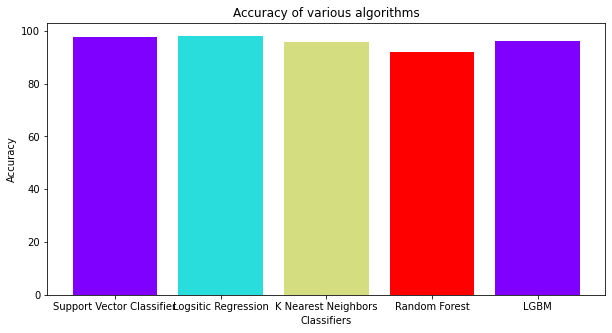

In [175]:

colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest','LGBM']
plt.figure(figsize=(10, 5))
plt.bar(labels,accuracy_scores, color = colors )
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')


## Using the highest accuracy classifier for predicting the X_test reserved from the beginning 

In [176]:
prediction2 = clf2.predict(df_test)

In [177]:
prediction2

array([6, 4, 3, 1, 5, 5, 1, 4, 1, 5, 6, 1, 2, 5, 2, 2, 2, 1, 2, 5, 1, 6,
       1, 6, 3, 4, 2, 1, 2, 5, 1, 4, 6, 4, 6, 1, 1, 5, 6, 3, 1, 4, 6, 2,
       2, 6, 1, 6, 5, 3, 6, 1, 3, 6, 3, 5, 1, 1, 5, 6, 3, 3, 6, 5, 6, 3,
       6, 6, 4, 3, 1, 1, 3, 5, 3, 1, 6, 1, 6, 1, 6, 2, 4, 5, 2, 2, 4, 2,
       5, 2, 2, 4, 4, 5, 5, 6, 4, 4, 2, 5, 4, 5, 1, 5, 1, 4, 1, 2, 1, 4,
       3, 5, 6, 4, 5, 4, 1, 4, 3, 6, 4, 4, 6, 1, 5, 1, 2, 6, 3, 6, 2, 1,
       1, 6, 1, 6, 2, 3, 4, 4, 1, 1, 5, 1, 6, 3, 4, 4, 6, 4, 2, 3, 3, 5,
       6, 1, 6, 6, 5, 6, 6, 6, 6, 6, 1, 1, 6, 3, 6, 5, 2, 3, 6, 5, 6, 3,
       6, 3, 1, 1, 2, 4, 6, 1, 6, 4, 4, 6, 4, 3, 6, 3, 6, 2, 6, 1, 5, 6,
       4, 2, 6, 2, 2, 6, 6, 2, 2, 6, 4, 3, 4, 5, 5, 1, 6, 4, 1, 4, 3, 2,
       4, 2, 2, 3, 4, 1, 2, 1, 2, 2, 5, 2, 4, 4, 2, 1, 3, 3, 6, 3, 6, 6,
       6, 5, 3, 2, 6, 2, 3, 1, 3, 6, 1, 3, 6, 4, 5, 1, 2, 4, 5, 3, 1, 2,
       4, 3, 3, 1, 1, 4, 1, 6, 3, 2, 3, 2, 4, 3, 4, 3, 6, 4, 4, 4, 5, 5,
       1, 6, 5, 5, 1, 6, 6, 2, 4, 4, 6, 2, 1, 6, 2,

In [178]:
DFPredictions = pd.DataFrame(prediction2) 

In [179]:
DFPredictions

0
0    6
1    4
2    3
3    1
4    5
..  ..
304  3
305  6
306  1
307  5
308  1

[309 rows x 1 columns]

In [180]:
DFPredictions[0]

0      6
1      4
2      3
3      1
4      5
      ..
304    3
305    6
306    1
307    5
308    1
Name: 0, Length: 309, dtype: int32

In [181]:
dic2={1:'WALKING', 2:'WALKING_UPSTAIRS', 3:'LAYING', 4:'SITTING',
       5:'WALKING_DOWNSTAIRS', 6:'STANDING'}

In [182]:
Y = DFPredictions[0].map(dic2)

In [183]:
DFPredictions[1]= Y

In [184]:
DFPredictions

0                   1
0    6            STANDING
1    4             SITTING
2    3              LAYING
3    1             WALKING
4    5  WALKING_DOWNSTAIRS
..  ..                 ...
304  3              LAYING
305  6            STANDING
306  1             WALKING
307  5  WALKING_DOWNSTAIRS
308  1             WALKING

[309 rows x 2 columns]

In [185]:
DFP=DFPredictions.drop([0],axis=1)

In [186]:
DFP

1
0              STANDING
1               SITTING
2                LAYING
3               WALKING
4    WALKING_DOWNSTAIRS
..                  ...
304              LAYING
305            STANDING
306             WALKING
307  WALKING_DOWNSTAIRS
308             WALKING

[309 rows x 1 columns]

In [187]:
DFP.to_csv('Predictions.csv')

# References 

https://stackabuse.com/change-figure-size-in-matplotlib/ 

https://towardsdatascience.com/activity-recognition-using-smartphones-machine-learning-application-a10e7b5578f9

https://nilesh-patil.github.io/blog/human-activity-recognition/

https://www.kaggle.com/rajasekaran2710/human-activity-recognition-using-pca-logistic-reg/code

https://www.kaggle.com/kashish8610/human-activity-recognition-using-neural-networks

https://www.kaggle.com/dskagglemt/svm-human-activity-recognition-with-smartphones

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16

https://www.kaggle.com/omermo/human-activity-recognition-95-acc

https://amete.github.io/DataSciencePortfolio/Udemy/Python-DS-and-ML-Bootcamp/Linear_Regression_Project.html